# Graphs for Diverse Led Funds

### Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'


In [2]:
df = pd.read_csv(
    "../00_source_data/Corporate Investments in Diverse Led Funds - Top 100 VC.csv",
    header=7,
    index_col=0,
)
df.reset_index(inplace=True, drop=True)

In [3]:
df.sample(5)


,VC Firm,Claim to support Diversity?,Diversity Investment Count,Total Investment Count,DIP: Diversity Investment Percentage,"Rank (1, highest DIP)",Website,Contact Information,Countries,Cities,Industries,Stages,Founded Year,Name of Founders,# of Investments,# of Exits,Min Check Size,Max Check Size,Funds Raised
96,Austin Ventures,Does not specify (https://austinventures.com/a...,17.0,390.0,4.36%,70,https://austinventures.com,khughes@austinventures.com,USA,Austin,"Fintech, Healthcare, Industrial, Enterprise, H...","Early Stage, Late Stage, Seed, Private Equity",1984,"Joe Aragona, Ken Deangelis",393,116.0,"$500,000",NaN,"$4,400,000,000"
44,Bossa Nova Investimentos,Does not specify,196.0,1685.0,11.63%,47,https://bossainvest.com,acesso@bossainvest.com,Brazil,São Paulo,"Internet & Mobile, E-Commerce, Crypto & Blockc...","Early Stage, Seed",2011,"João Kepler, Pierre Schurmann",668,46.0,"R$100,000","R$1,500,000","R$965,000,000"
60,InterWest Partners,"Yes, they have a detailed Discrimination, Hara...",56.0,425.0,13.18%,41,https://interwest.com,NaN,USA,Santa Clara,"Biotech, Life Sciences, Advertising, E-Commerc...",Early Stage,1979,Keval Desai,561,286.0,"$10,000,000","$15,000,000","$260,000,000"
4,MassChallenge,Says their non-profit model helps provides acc...,437.0,3040.0,14.38%,32,https://masschallenge.org,info@masschallenge.org,"USA, Israel, Mexico, Switzerland, South Korea,...","Boston, Texas City","Fintech, Healthcare, Cybersecurity, Climate & ...",Early Stage,2010,"John Harthorne, Akhil Nigam",2103,562.0,NaN,"$2,000,000","$8,600,000,000"
76,F-Prime Capital Partners,Does not specify (https://fprimecapital.com/ab...,60.0,418.0,14.35%,33,https://fprimecapital.com/,info@fprimecapital.com,"United Kingdom, USA","Cambridge, London, San Francisco","Enterprise, Fintech, Healthcare",Early Stage,1969,Stephen Knight Md,466,135.0,NaN,NaN,"$30,000,000"


In [4]:
# change DIP: Diversity Investment Percentage to float
df["DIP: Diversity Investment Percentage"] = (
    df["DIP: Diversity Investment Percentage"]
    .str.replace("%", "")
    .astype(float)
)

### Create Graphs

#### Graph 1: Total investment count for top 100 VC firms

In [5]:
df_sorted = df.sort_values(by="Total Investment Count", ascending=False)
# drop nan
df_sorted.dropna(inplace=True)

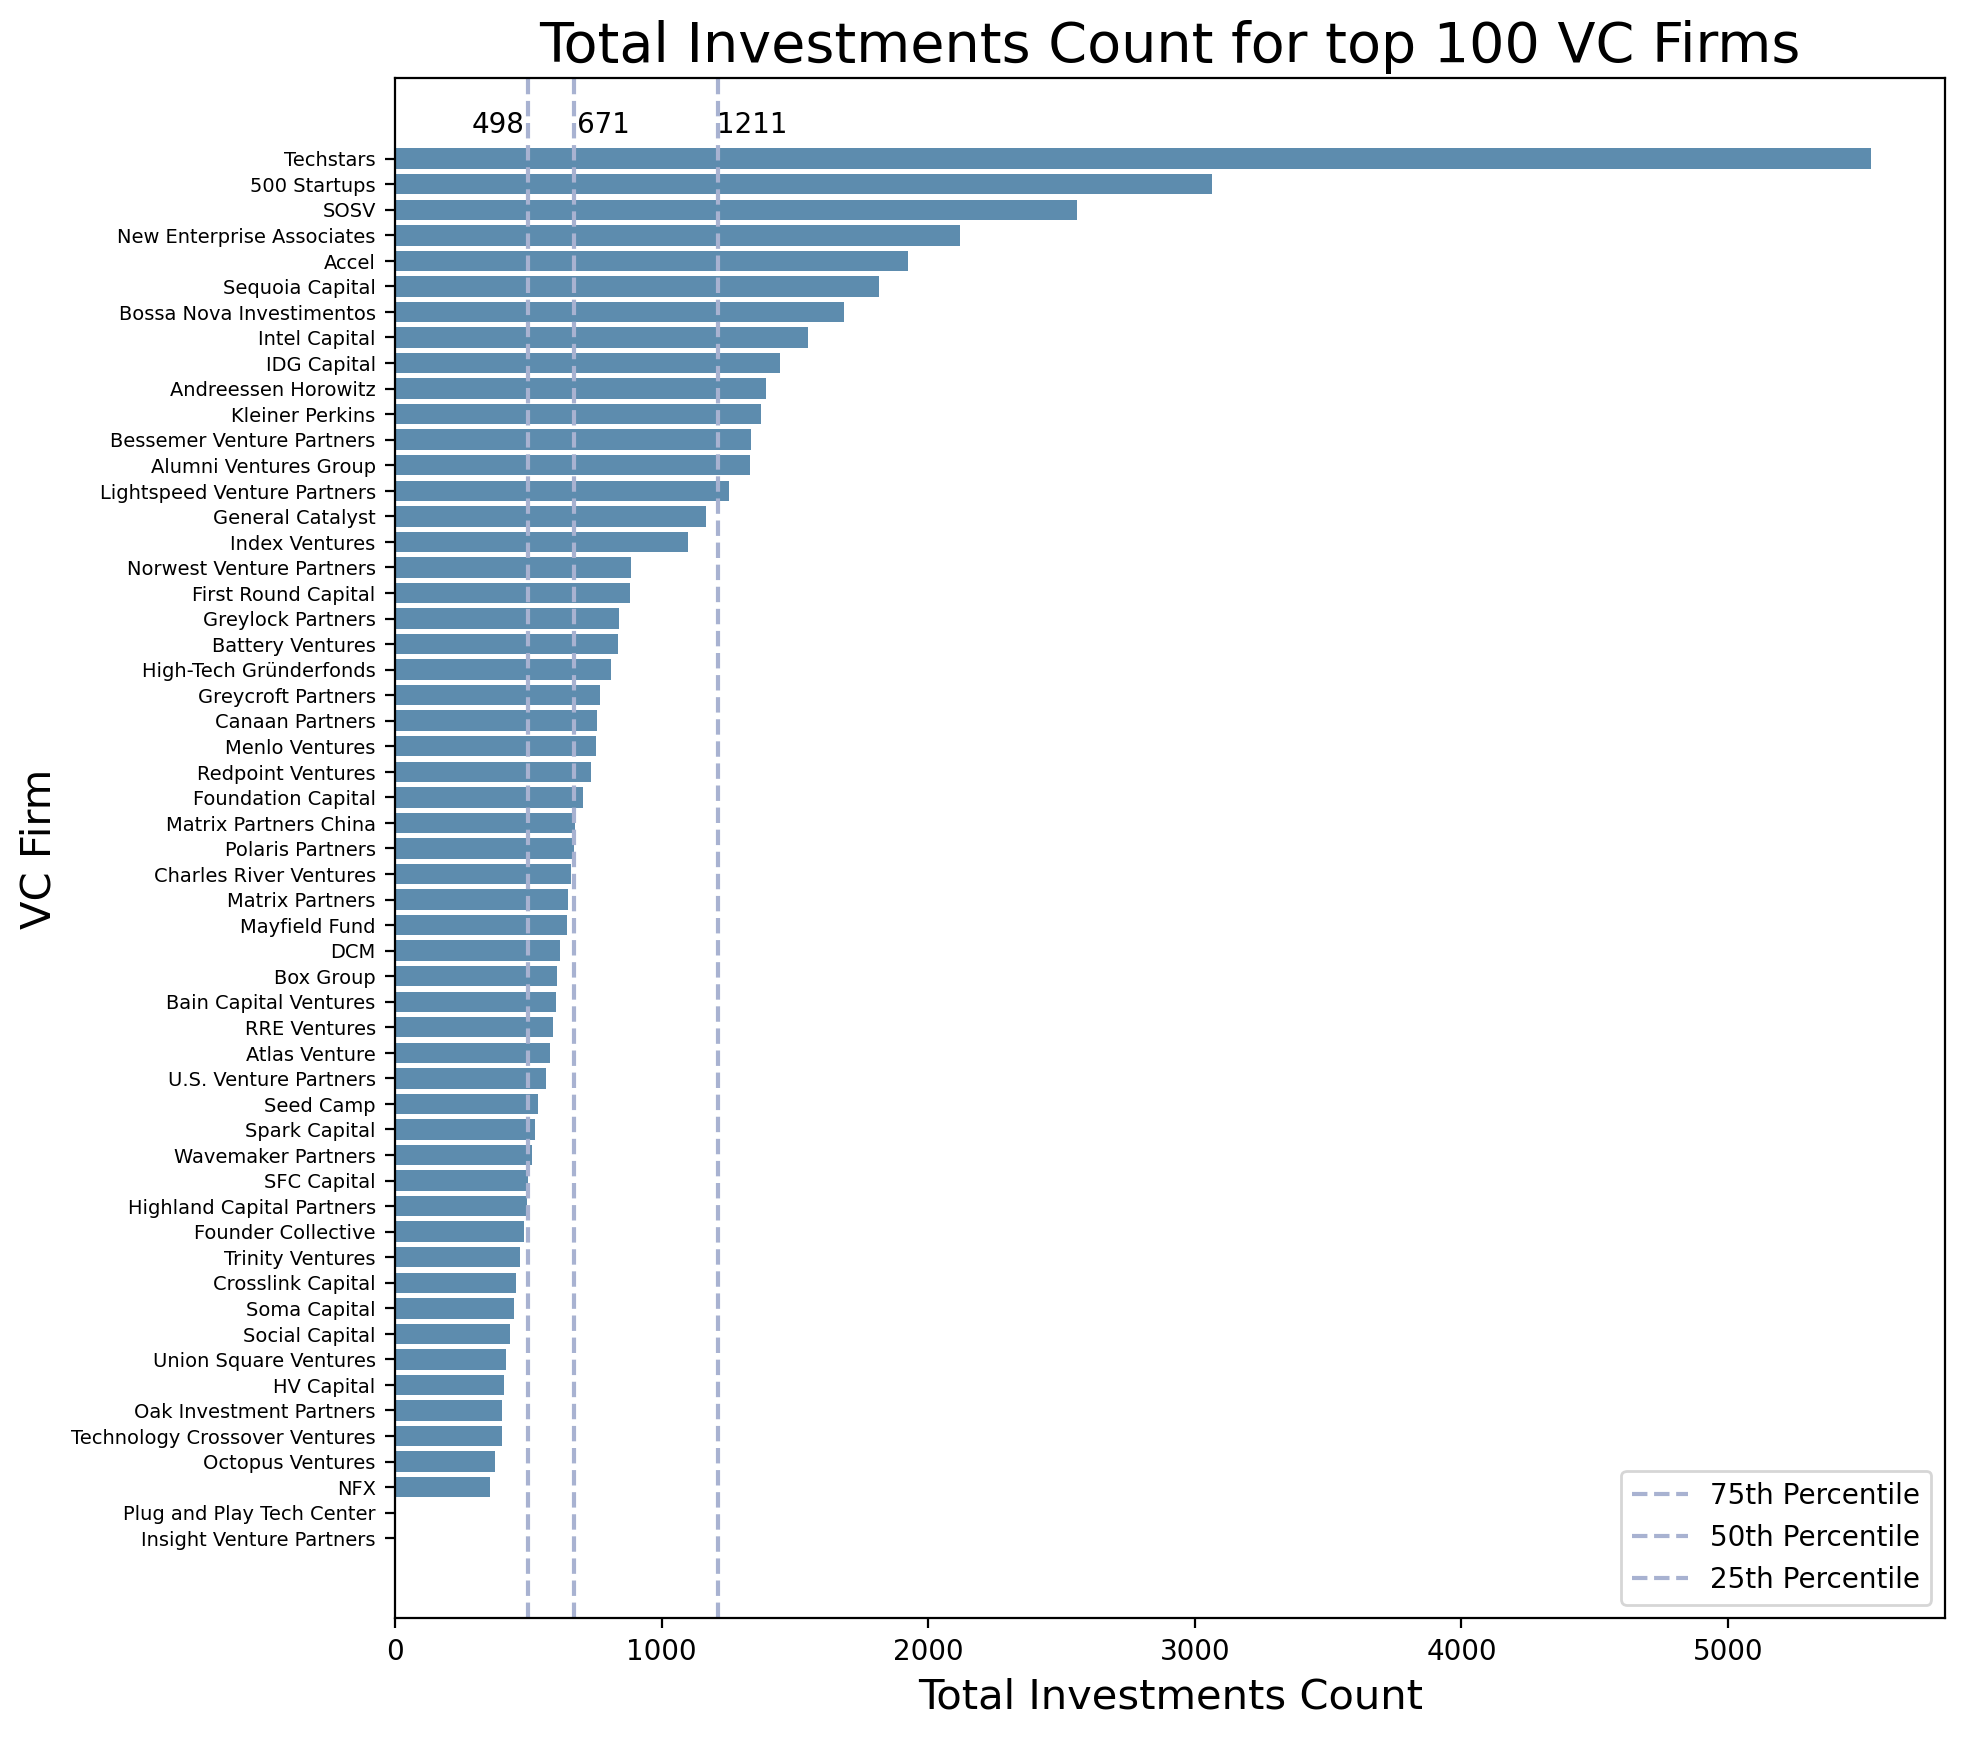

In [6]:
# create a bar chart of total investments count
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(
    df_sorted["VC Firm"], df_sorted["Total Investment Count"], color="#5D8CAE"
)
ax.set_title("Total Investments Count for top 100 VC Firms", fontsize=20)
ax.set_ylabel("VC Firm", fontsize=15)
ax.set_xlabel("Total Investments Count", fontsize=15)
ax.tick_params(axis="y", labelsize=7)
pv_75 = np.percentile(df_sorted["Total Investment Count"], 75)
pv_50 = np.percentile(df_sorted["Total Investment Count"], 50)
pv_25 = np.percentile(df_sorted["Total Investment Count"], 25)
ax.axvline(pv_75, color="#A8B2D1", linestyle="--", label="75th Percentile")
ax.annotate(
    str(int(pv_75) + 1),
    xy=(pv_75 + 130, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_50, color="#A8B2D1", linestyle="--", label="50th Percentile")
ax.annotate(
    str(int(pv_50) + 1),
    xy=(pv_50 + 110, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_25, color="#A8B2D1", linestyle="--", label="25th Percentile")
ax.annotate(
    str(int(pv_25) + 1),
    xy=(pv_25 - 110, -1),
    ha="center",
    annotation_clip=False,
)
ax.legend()
plt.gca().invert_yaxis()
plt.show()


In [7]:
df_sorted["Total Investment Count"].describe()


count      55.000000
mean      958.036364
std       865.099180
min         2.000000
25%       497.000000
50%       670.000000
75%      1210.000000
max      5538.000000
Name: Total Investment Count, dtype: float64

In [8]:
df_sorted[df_sorted["VC Firm"] == "Plug and Play Tech Center"]

,VC Firm,Claim to support Diversity?,Diversity Investment Count,Total Investment Count,DIP: Diversity Investment Percentage,"Rank (1, highest DIP)",Website,Contact Information,Countries,Cities,Industries,Stages,Founded Year,Name of Founders,# of Investments,# of Exits,Min Check Size,Max Check Size,Funds Raised
9,Plug and Play Tech Center,Designed a diversity initiative to better prov...,0.0,3.0,0.0,86,https://plugandplaytechcenter.com,investment@plugandplaytechcenter.com,"USA, Canada, Brazil, United Arab Emirates, Net...","Chicago, Cleveland, Detroit, São Paulo, Topeka...","DTC, Enterprise, Fintech, Food & Beverage, Hea...","Early Stage, Series A, Series B, Series C",2006,"Ali Safavi, Jackie Hernandez, Saeed Amidi",1447,140.0,"$50,000","$250,000","$45,500,000"


In [9]:
# save the figure
fig.savefig(
    "../30_results/Total Investments Count for top 100 VC Firms.png",
    dpi=300,
    bbox_inches="tight",
)

#### Graph 2: Diversity investment count for top 100 VC firms

In [10]:
# sort by Diversity Investment Count
df_sorted_di = df.sort_values(by="Diversity Investment Count", ascending=False)
# drop nan
df_sorted_di.dropna(inplace=True)

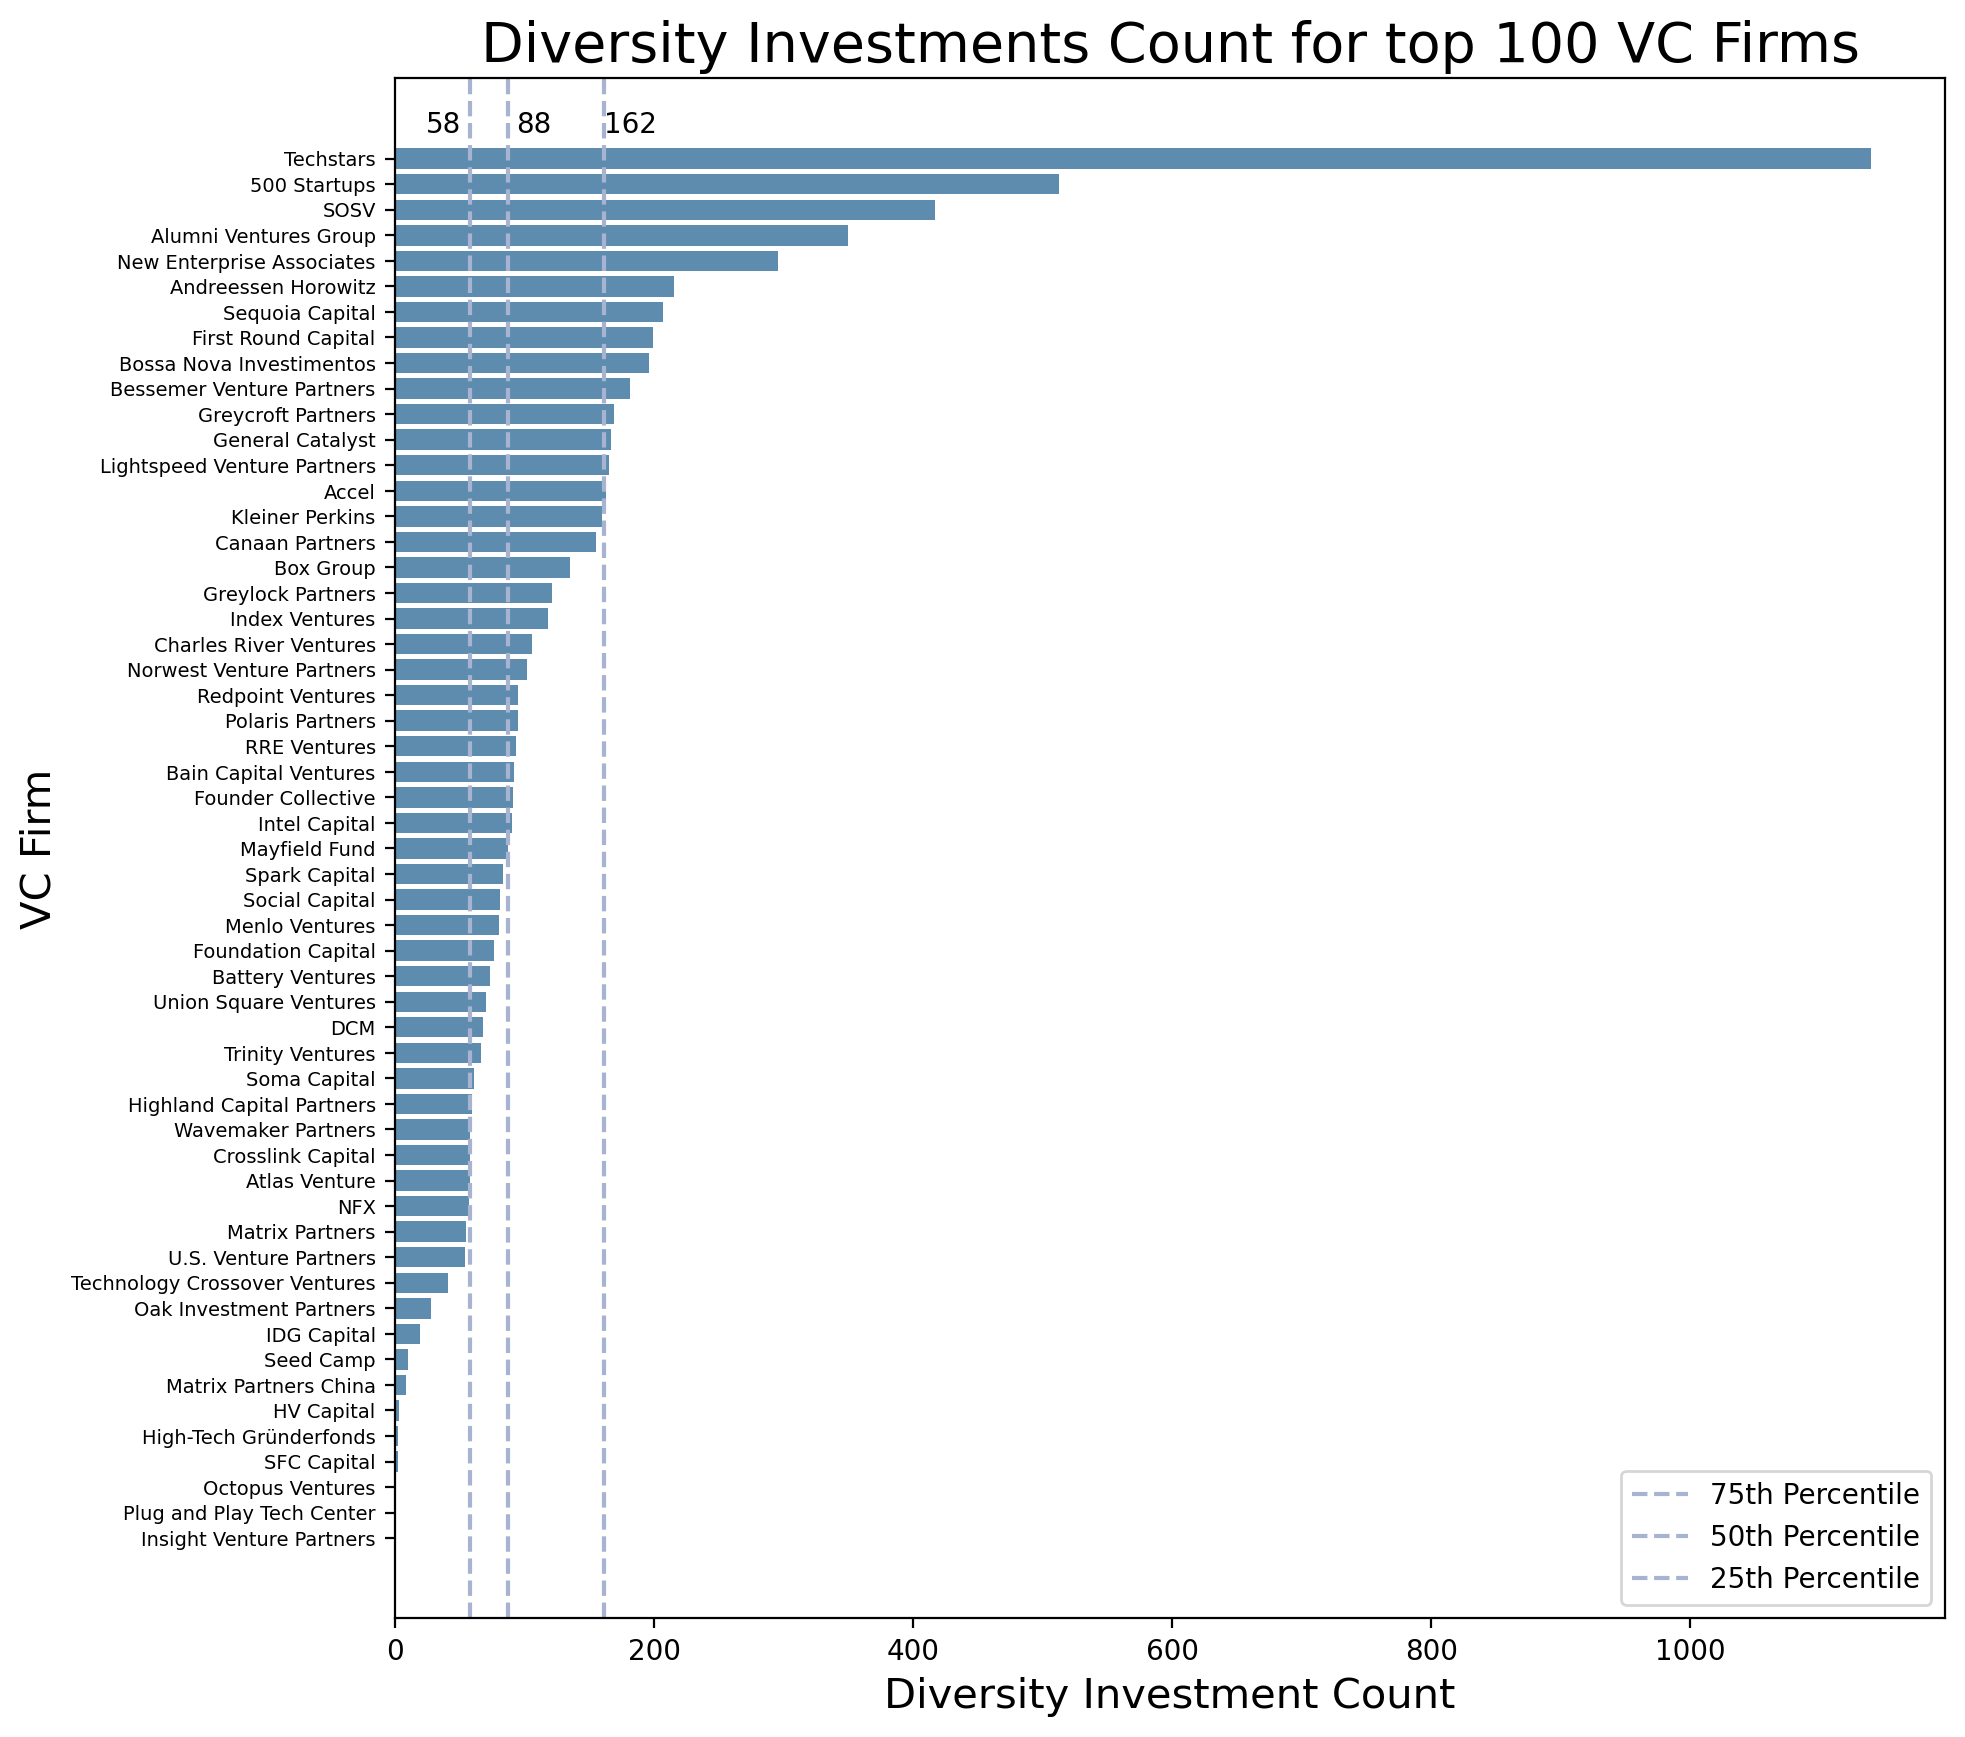

In [11]:
# create a bar chart of diversity investments count
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(
    df_sorted_di["VC Firm"],
    df_sorted_di["Diversity Investment Count"],
    color="#5D8CAE",
)
ax.set_title("Diversity Investments Count for top 100 VC Firms", fontsize=20)
ax.set_ylabel("VC Firm", fontsize=15)
ax.set_xlabel("Diversity Investment Count", fontsize=15)
ax.tick_params(axis="y", labelsize=7)
pv_75 = np.percentile(df_sorted_di["Diversity Investment Count"], 75)
pv_50 = np.percentile(df_sorted_di["Diversity Investment Count"], 50)
pv_25 = np.percentile(df_sorted_di["Diversity Investment Count"], 25)
ax.axvline(pv_75, color="#A8B2D1", linestyle="--", label="75th Percentile")
ax.annotate(
    str(int(pv_75) + 1),
    xy=(pv_75 + 20, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_50, color="#A8B2D1", linestyle="--", label="50th Percentile")
ax.annotate(
    str(int(pv_50) + 1),
    xy=(pv_50 + 20, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_25, color="#A8B2D1", linestyle="--", label="25th Percentile")
ax.annotate(
    str(int(pv_25) + 1),
    xy=(pv_25 - 20, -1),
    ha="center",
    annotation_clip=False,
)
ax.legend()
plt.gca().invert_yaxis()
plt.show()

In [12]:
# save the figure
fig.savefig(
    "../30_results/Diversity Investments Count for top 100 VC Firms.png",
    dpi=300,
    bbox_inches="tight",
)

#### Graph 3: Diversity investment percentage for top 100 VC firms

In [13]:
# sort by DIP: Diversity Investment Percentage
df_sorted_dip = df.sort_values(
    by="DIP: Diversity Investment Percentage", ascending=False
)
# drop nan
df_sorted_dip.dropna(inplace=True)

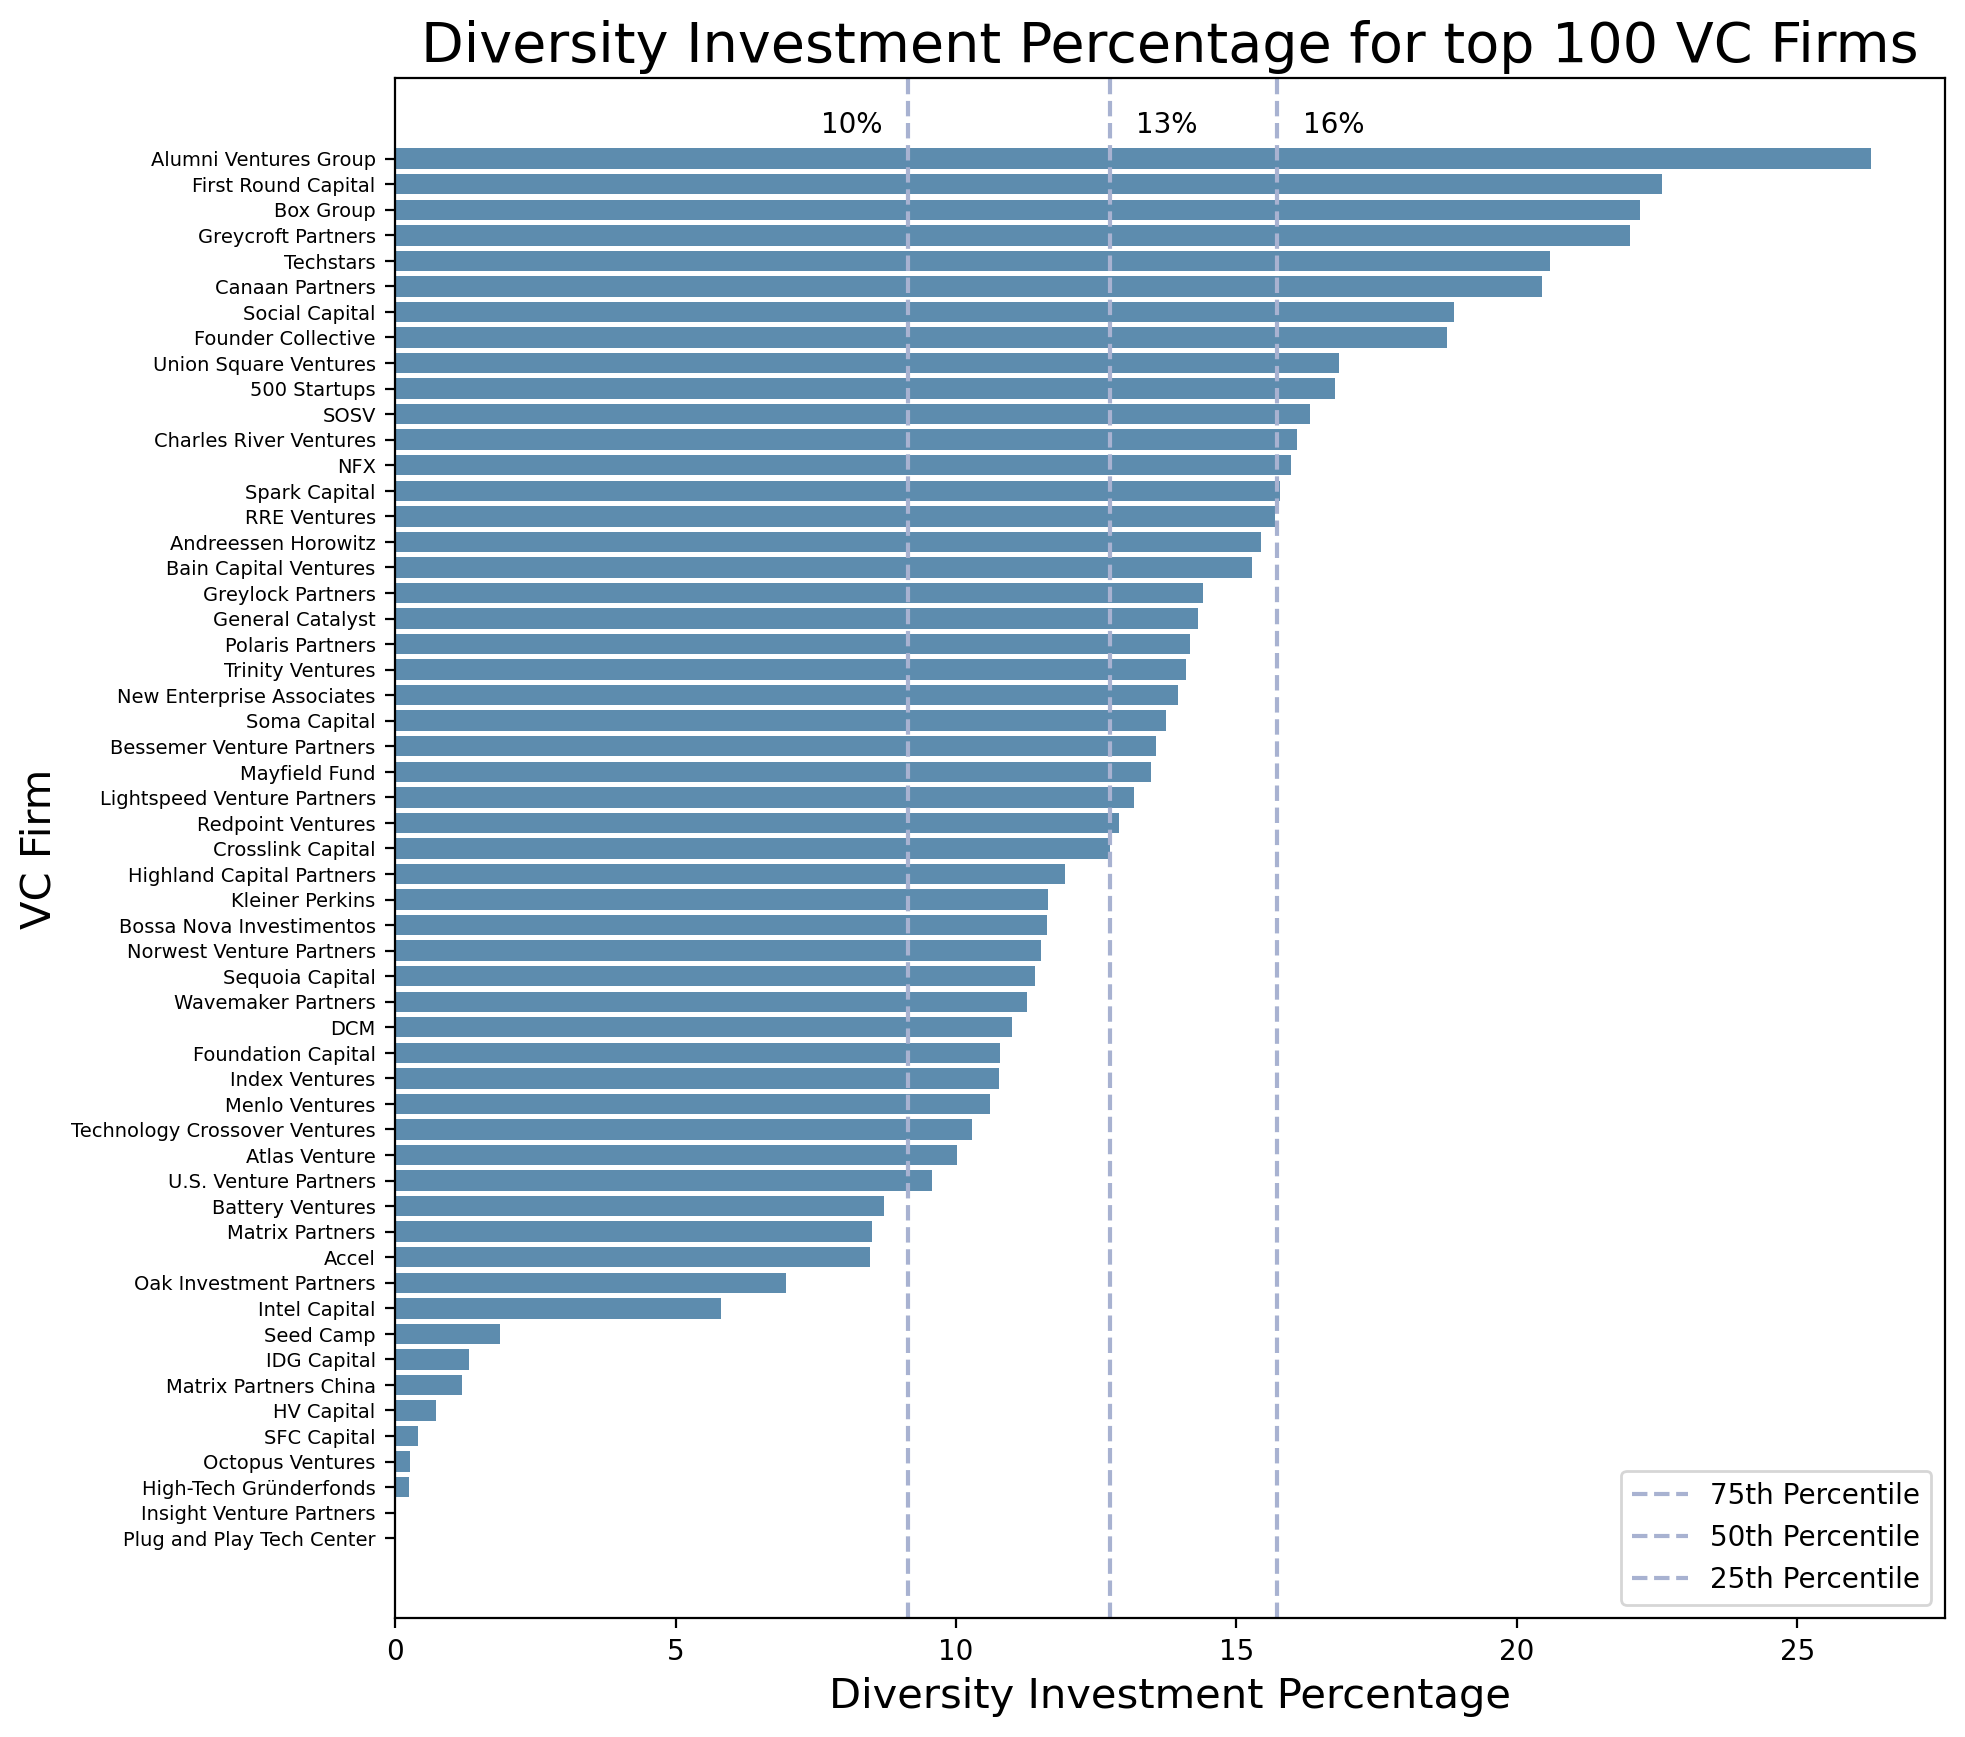

In [14]:
# create a bar chart of diversity investment percentage
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(
    df_sorted_dip["VC Firm"],
    df_sorted_dip["DIP: Diversity Investment Percentage"],
    color="#5D8CAE",
)
ax.set_title(
    "Diversity Investment Percentage for top 100 VC Firms", fontsize=20
)
ax.set_ylabel("VC Firm", fontsize=15)
ax.set_xlabel("Diversity Investment Percentage", fontsize=15)
ax.tick_params(axis="y", labelsize=7)
pv_75 = np.percentile(
    df_sorted_dip["DIP: Diversity Investment Percentage"], 75
)
pv_50 = np.percentile(
    df_sorted_dip["DIP: Diversity Investment Percentage"], 50
)
pv_25 = np.percentile(
    df_sorted_dip["DIP: Diversity Investment Percentage"], 25
)
ax.axvline(pv_75, color="#A8B2D1", linestyle="--", label="75th Percentile")
ax.annotate(
    str(int(pv_75 + 1)) + "%",
    xy=(pv_75 + 1, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_50, color="#A8B2D1", linestyle="--", label="50th Percentile")
ax.annotate(
    str(int(pv_50) + 1) + "%",
    xy=(pv_50 + 1, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_25, color="#A8B2D1", linestyle="--", label="25th Percentile")
ax.annotate(
    str(int(pv_25) + 1) + "%",
    xy=(pv_25 - 1, -1),
    ha="center",
    annotation_clip=False,
)
ax.legend()
plt.gca().invert_yaxis()
plt.show()

In [15]:
# save the figure
fig.savefig(
    "../30_results/Diversity Investment Percentage for top 100 VC Firms.png",
    dpi=300,
    bbox_inches="tight",
)

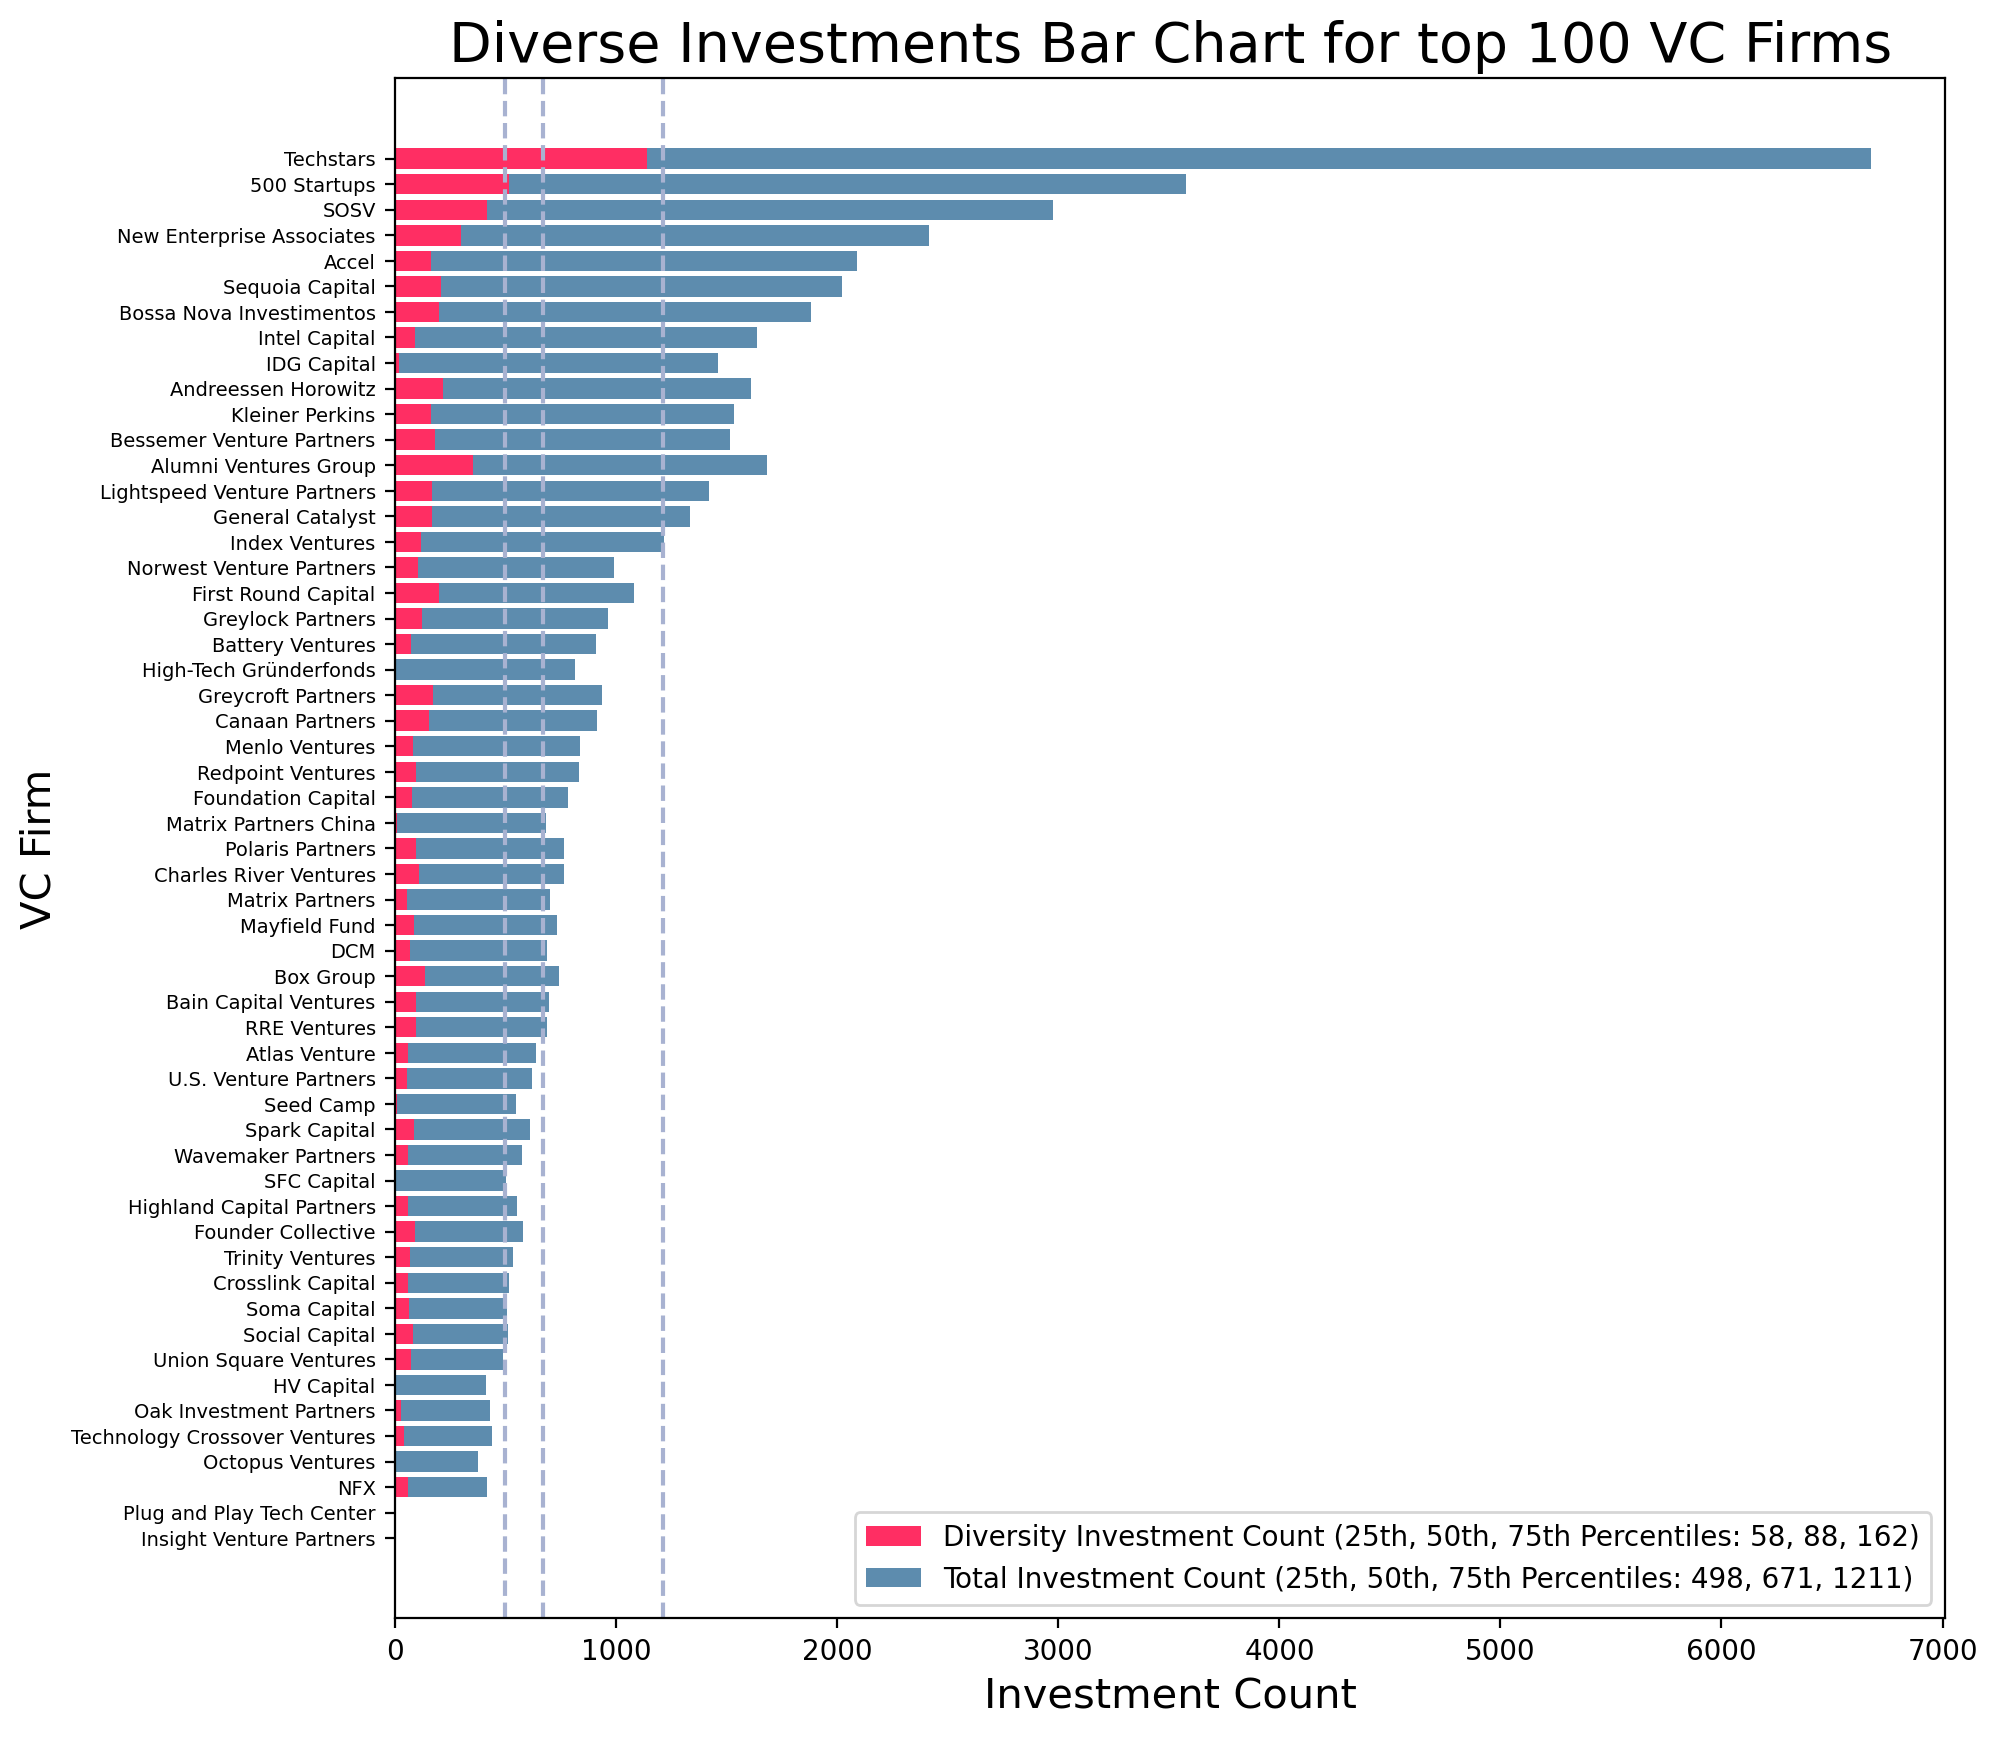

In [43]:
# combine all three charts
# width = 0.3
fig, ax = plt.subplots(figsize=(10, 10))

ax.barh(
    df_sorted["VC Firm"],
    df_sorted["Diversity Investment Count"],
    color="#ff2e63",
)
ax.barh(
    df_sorted["VC Firm"],
    df_sorted["Total Investment Count"],
    color="#5D8CAE",
    left=df_sorted["Diversity Investment Count"],
)
ax.set_title("Diverse Investments Bar Chart for top 100 VC Firms", fontsize=20)
ax.set_ylabel("VC Firm", fontsize=15)
ax.set_xlabel("Investment Count", fontsize=15)
ax.tick_params(axis="y", labelsize=7)
ax.legend(
    [
        "Diversity Investment Count (25th, 50th, 75th Percentiles: 58, 88, 162)",
        "Total Investment Count (25th, 50th, 75th Percentiles: 498, 671, 1211)",
    ]
)
pv_75 = np.percentile(df_sorted["Total Investment Count"], 75)
pv_50 = np.percentile(df_sorted["Total Investment Count"], 50)
pv_25 = np.percentile(df_sorted["Total Investment Count"], 25)
ax.axvline(pv_75, color="#A8B2D1", linestyle="--")
ax.axvline(pv_50, color="#A8B2D1", linestyle="--")
ax.axvline(pv_25, color="#A8B2D1", linestyle="--")

# dpv_75 = np.percentile(df_sorted_di["Diversity Investment Count"], 75)
# dpv_50 = np.percentile(df_sorted_di["Diversity Investment Count"], 50)
# dpv_25 = np.percentile(df_sorted_di["Diversity Investment Count"], 25)
# ax.axvline(dpv_75, color="#F5A9A9", linestyle="--")
# ax.axvline(dpv_50, color="#F5A9A9", linestyle="--")
# ax.axvline(dpv_25, color="#F5A9A9", linestyle="--")

plt.gca().invert_yaxis()
plt.show()

In [41]:
# save the figure
fig.savefig(
    "../30_results/Diverse Investments Bar Chart for top 100 VC Firms.png",
    dpi=300,
    bbox_inches="tight",
)